#Source: https://www.concertarchives.org/venues/staples-center?page=1&year=2019

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("2019_Staples_Center - Sheet1.csv")
print(df)

        Month  # of Concerts              Notes
0    January               4  4 ELTON JOHN? (7)
1    February              1                NaN
2       March              2                NaN
3      April               4                NaN
4        May               5                NaN
5        June              7                NaN
6        July              3                NaN
7      August              6                NaN
8   September              1                NaN
9     October              4                NaN
10   November              3                NaN
11   December              2                NaN


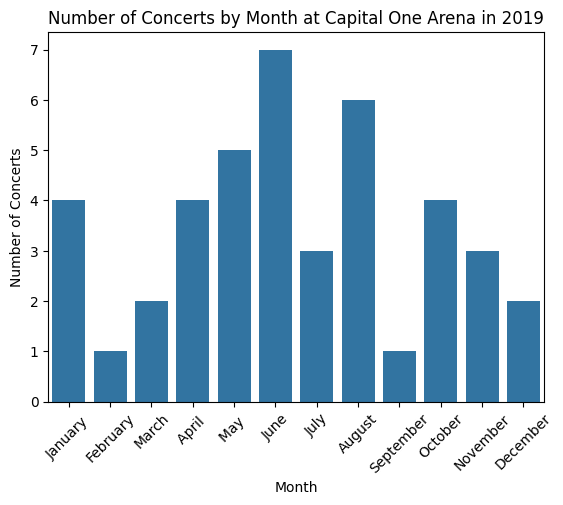

In [28]:
Months = df["Month"]
Concerts = df['# of Concerts']
sns.barplot(x=Months, y=Concerts)

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Concerts')
plt.title('Number of Concerts by Month at Capital One Arena in 2019')

# Show the plot
plt.show()


In [29]:
category_colors = {
    "Section 100": "#66c2a5",
    "Section 200": "#fc8d62",
    "Section 400": "#8da0cb",
    "Lexus Level": "#e78ac3",
    "Kettler Loft": "#a6d854",
    "Lower Level Suite": "#ffd92f",
    "Floor": "#e5c494"
}


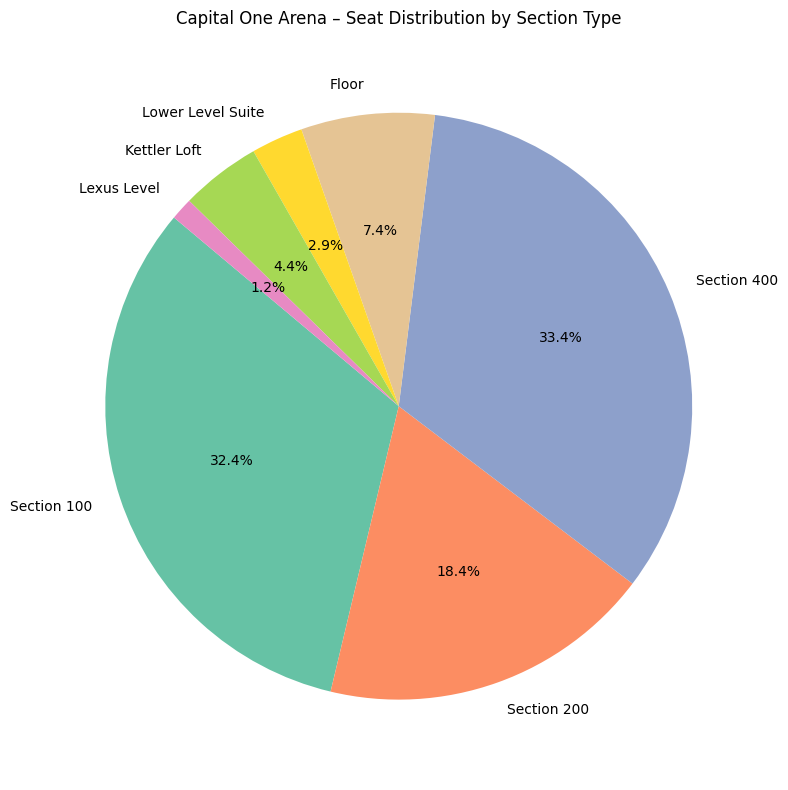

In [30]:
#Pie chart of seat dist
df_seating = pd.read_csv("capital_one_seating_price - attempt2.csv")
df_seating['Min Seats'] = pd.to_numeric(df_seating['Min Seats'], errors='coerce')

# Categories
section_100 = 0
section_200 = 0
section_400 = 0
floor = 0
suite_lower = 0
suite_kettler = 0
suite_lexus = 0

# seat counts by section
for index, row in df_seating.iterrows():
    section = row["Section"]
    seats = row["Min Seats"]

    if pd.isna(seats):
        continue

    if section.startswith("Section"):
        try:
            number = int(section.split()[1])
        except (IndexError, ValueError):
            continue

        if 100 <= number < 200:
            section_100 += seats
        elif 200 <= number < 300:
            section_200 += seats
        elif 400 <= number < 500:
            section_400 += seats

    elif section.startswith("Floor"):
        floor += seats

    elif section == "Lower Level Suite":
        suite_lower += seats
    elif section == "Kettler Loft":
        suite_kettler += seats
    elif section == "Lexus Level":
        suite_lexus += seats

# Labels
labels = [
    'Section 100', 'Section 200', 'Section 400',
    'Floor', 'Lower Level Suite', 'Kettler Loft', 'Lexus Level'
]
sizes = [
    section_100, section_200, section_400,
    floor, suite_lower, suite_kettler, suite_lexus
]

category_colors = {
    "Section 100": "#66c2a5",
    "Section 200": "#fc8d62",
    "Section 400": "#8da0cb",
    "Lexus Level": "#e78ac3",
    "Kettler Loft": "#a6d854",
    "Lower Level Suite": "#ffd92f",
    "Floor": "#e5c494"
}
colors = [category_colors[label] for label in labels]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Capital One Arena – Seat Distribution by Section Type")
plt.axis('equal')  
plt.tight_layout()
plt.show()


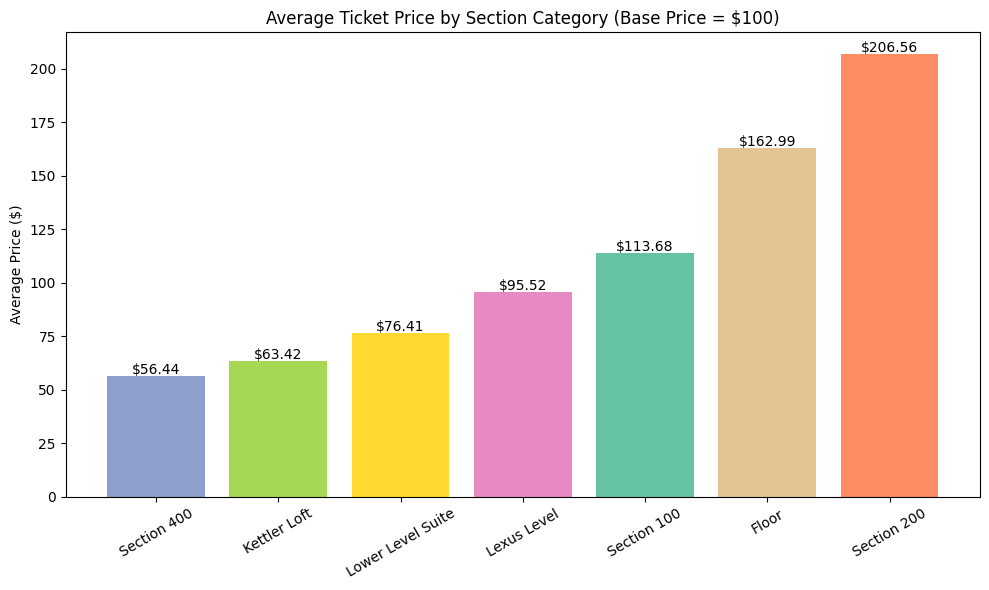

In [31]:
df_av_price_100 = pd.read_csv("dynamic_prices_$100.csv")

def categorize_section(section):
    if section.startswith("Section "):
        try:
            number = int(section.split(" ")[1])
            if 100 <= number < 200:
                return "Section 100"
            elif 200 <= number < 300:
                return "Section 200"
            elif 400 <= number < 500:
                return "Section 400"
        except:
            return "Other"
    elif "Lexus" in section:
        return "Lexus Level"
    elif "Kettler" in section:
        return "Kettler Loft"
    elif "Lower" in section:
        return "Lower Level Suite"
    elif "Floor" in section:
        return "Floor"
    else:
        return "Other"

# categorization
df_av_price_100["Category"] = df_av_price_100["Section"].apply(categorize_section)
category_avg_prices = df_av_price_100.groupby("Category")["DynamicPrice"].mean().round(2).sort_values()

# match colors
category_colors = {
    "Section 100": "#66c2a5",
    "Section 200": "#fc8d62",
    "Section 400": "#8da0cb",
    "Lexus Level": "#e78ac3",
    "Kettler Loft": "#a6d854",
    "Lower Level Suite": "#ffd92f",
    "Floor": "#e5c494"
}

colors = [category_colors.get(cat, "#b3b3b3") for cat in category_avg_prices.index]


plt.figure(figsize=(10, 6))
bars = plt.bar(category_avg_prices.index, category_avg_prices.values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"${height:.2f}", ha='center', fontsize=10)

plt.title("Average Ticket Price by Section Category (Base Price = $100)")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


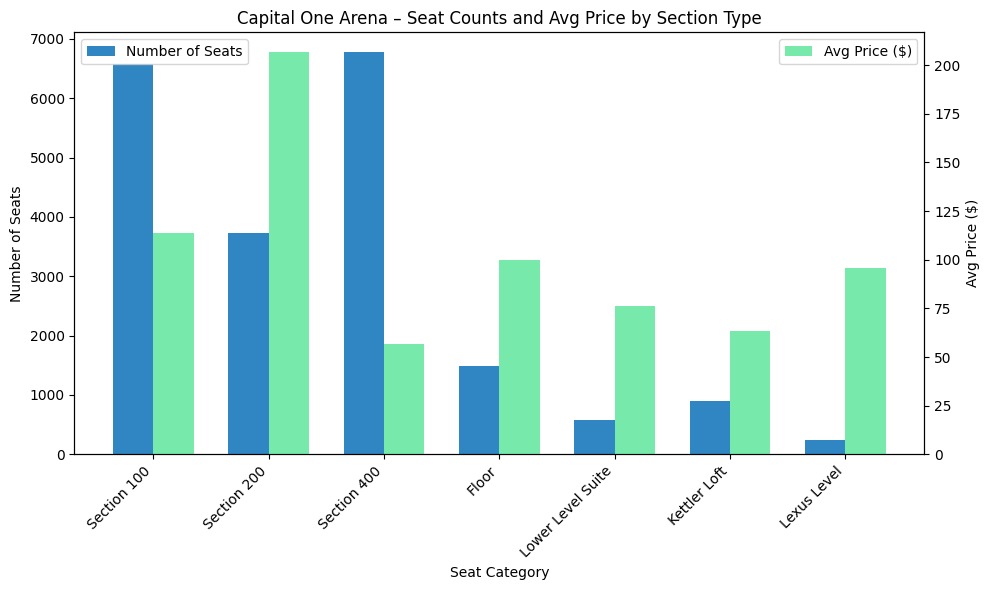

In [ ]:
price_df = pd.read_csv("dynamic_prices_$100.csv")
price_df['SectionType'] = price_df['Section'].apply(lambda x: (
    "Section 100" if x.startswith("Section 1") else
    "Section 200" if x.startswith("Section 2") else
    "Section 400" if x.startswith("Section 4") else
    x  # "Floor", "Lexus Level", etc.
))

# Group by section type and calculate average price
avg_prices = price_df.groupby("SectionType")["DynamicPrice"].mean().to_dict()

# --- Seat counts (from previous script) ---
seat_counts = {
    "Section 100": section_100,
    "Section 200": section_200,
    "Section 400": section_400,
    "Floor": floor,
    "Lower Level Suite": suite_lower,
    "Kettler Loft": suite_kettler,
    "Lexus Level": suite_lexus
}

# Prepare data
labels = list(seat_counts.keys())
x = np.arange(len(labels))
width = 0.35

seats = [seat_counts[label] for label in labels]
prices = [avg_prices.get(label, 100) for label in labels]  # fallback to $100 if missing

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

bars1 = ax1.bar(x - width/2, seats, width, label='Number of Seats', color= '#3085c3')
ax1.set_ylabel('Number of Seats')
ax1.set_xlabel('Seat Category')
ax1.set_title('Capital One Arena – Seat Counts and Avg Price by Section Type')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right')

# Create secondary axis for price
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, prices, width, label='Avg Price ($)', color='#1ddb73', alpha=0.6)
ax2.set_ylabel('Avg Price ($)')

# Legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
